# Planning Telescope observation

p(clear tomorrow|cloudy today) = 0.5\
p(cloudy tomorrow|cloudy today) = 0.5\
p(cloudy tomorrow|clear today) = 0.1\
p(clear tomorrow|clear today) = 0.9

Tasks
- Start off on a cloud day.
- Implement your weather forecast based on the above p probabilities
- Run your simulator for N days (with $N\geq 4$)
- Prepare a plot with the number of days on the x axis and the cumulative fraction of, say, sunny days over the number of days so far on the y axis. This is called a trace-plot, showing how our estimate of p(clear) evolves as the chain samples.
- Prepare a histogram of the above plot. This reveals the distribution of p(clear).
- Use a summary statistics to determine the most likely value and an error on our estimate.

In [1]:
import sys
sys.path.append(r"C:\Users\ricca\Documents\Unimib-Code\Astrostatistics\Notebooks\venv\Utilities")
from Utilities import plot_settings
import numpy as np
import matplotlib.pyplot as plt

$0 \to cloudy$\
$1 \to clear$

In [2]:
def get_weather(w_in):    
    
    if w_in==0:
        w_out = float(np.random.choice(2, 1, p=[0.5,0.5])[0]) # if the weather today is crap, we get 50-50 chance for it to be clear/cloudy tomorrow
    else:
        w_out = float(np.random.choice(2, 1, p=[0.1,0.9])[0]) # if the weather today is cool, we get 10-90 chance for it to be cloudy/clear tomorrow
    
    return w_out

In [3]:
N = int(1e5) # Number of days weather to be predicted

In [4]:
forecast = np.zeros(N)

In [5]:
for i in range(forecast.size-1):
    forecast[i+1] = get_weather(forecast[i])

Checking result

In [6]:
is_clear = 1 - forecast  # flip 1<->0 so clear = 1
cumulative_clear = np.cumsum(is_clear)
fraction_clear = cumulative_clear / np.arange(1, N + 1)

In [7]:
p_cloudy = forecast[forecast<1].size/N
print(f'p(cloudy) = {p_cloudy}')
p_clear  = forecast[forecast>0].size/N
print(f'p(clear)  = {p_clear}')

p(cloudy) = 0.16779
p(clear)  = 0.83221


These are just the right probabilities!\
Let's look at the trace plot

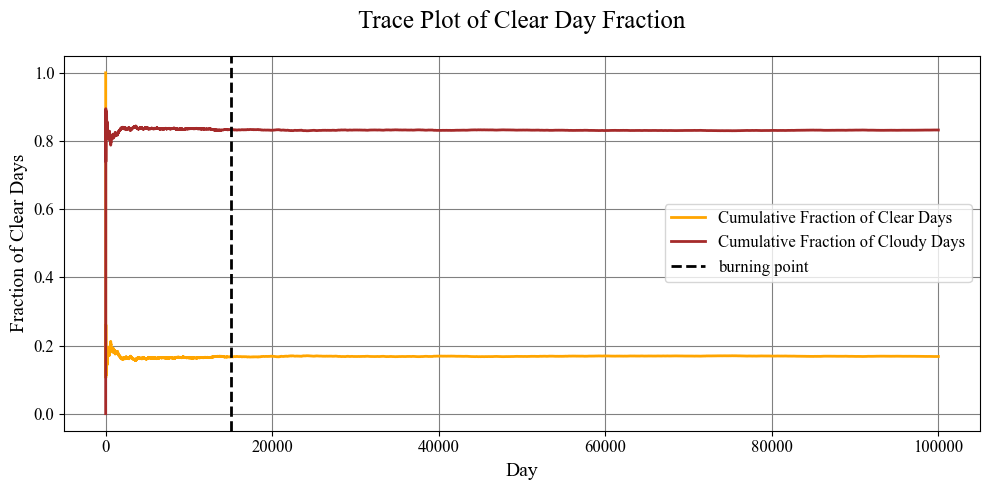

In [9]:
plt.plot(fraction_clear, lw=2, color='orange' ,label='Cumulative Fraction of Clear Days')
plt.plot(1-fraction_clear, lw=2, color='brown' ,label='Cumulative Fraction of Cloudy Days')
plt.xlabel('Day')
plt.ylabel('Fraction of Clear Days')
plt.title('Trace Plot of Clear Day Fraction')
plt.axvline(15000, 0, 1, linestyle='--', color='black', label='burning point')
plt.legend()

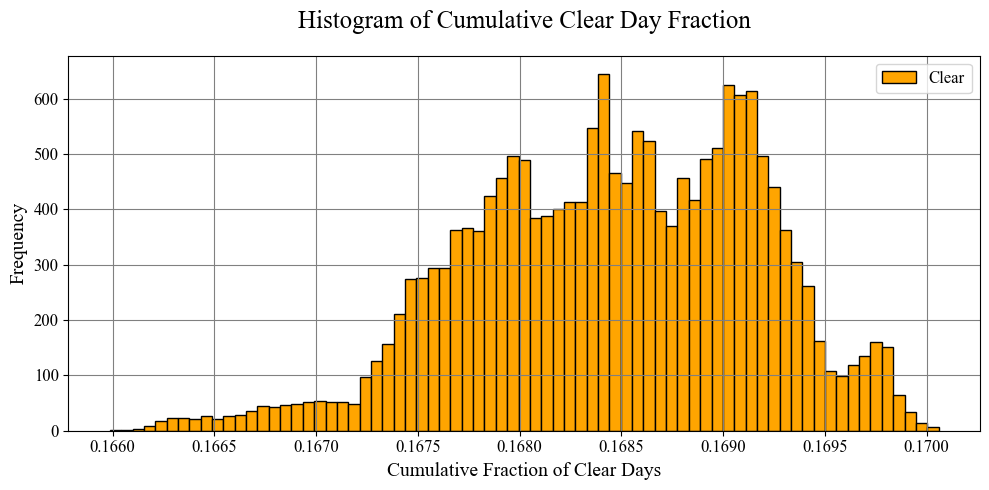

In [10]:
clear_counts, clear_bins, _ = plt.hist(fraction_clear[15000:], bins='scott', density=True, color='orange', edgecolor='black', alpha=1, label='Clear')
plt.xlabel('Cumulative Fraction of Clear Days')
plt.ylabel('Frequency')
plt.title('Histogram of Cumulative Clear Day Fraction')
plt.legend()

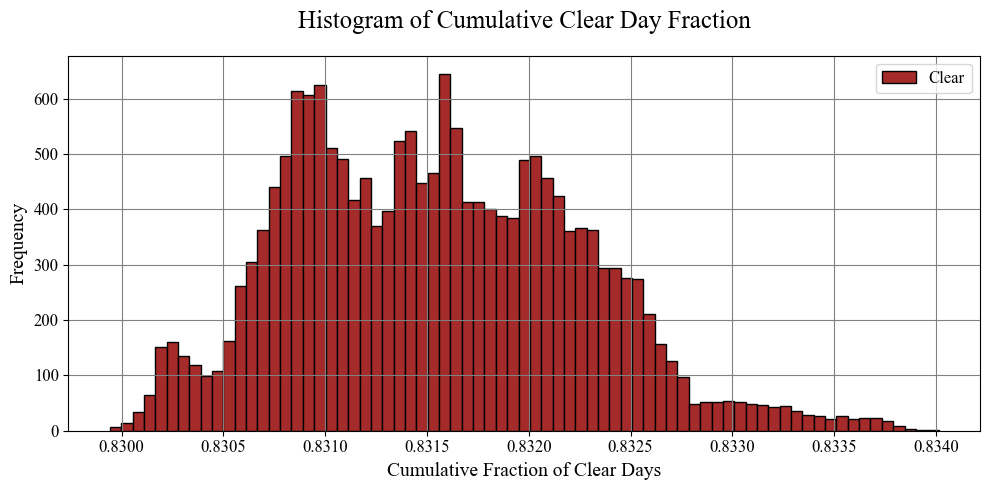

In [11]:
cloudy_counts, cloudy_bins, _ = plt.hist(1-fraction_clear[15000:], bins='scott', density=True, color='brown', edgecolor='black', alpha=1, label='Clear')
plt.xlabel('Cumulative Fraction of Clear Days')
plt.ylabel('Frequency')
plt.title('Histogram of Cumulative Clear Day Fraction')
plt.legend()

In [15]:
# Summary statistics
final_estimate = fraction_clear[15000:].mean()
std_dev = fraction_clear[15000:].std()  # reduce burn-in bias

print(f"Estimated fraction of clear days: {final_estimate:.3f} ± {std_dev:.3f}")

Estimated fraction of clear days: 0.168 ± 0.001


In [16]:
forecast = np.zeros(N)

In [18]:
final = 0
for _ in range(10):
    for i in range(forecast.size-1):
        forecast[i+1] = get_weather(forecast[i])
    final += forecast[20000:].mean()

In [19]:
print(f"Estimated fraction of clear days: {final/10:.3f} ± {std_dev:.3f}")

Estimated fraction of clear days: 0.834 ± 0.001
